In [1]:
# imports
import numpy as np
import os
import cv2
import nibabel as nib
# imports from kaggle example https://www.kaggle.com/kmader/show-3d-nifti-images
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from glob import glob


# Create .gif from fdata

## Define Functions

### Define function to create list of folder names within a given directory

In [2]:
def get_dir_folders(directory):
    '''
    Input: list-like directory containing the folder names / file names within a given parent folder
    Returns: list clean_directory containing only folder names within the parent folder
    '''
    # create list copy of directory
    clean_directory = list(directory)
    
    # iterate through directory
    for name in directory:
        
        # remove all names with file extensions
        print('path: ', name)
        
        filename = name.split('/')[-1]
        
        if '.' in filename:
            print(f'remove {name} from list')
            directory.remove(name)
            
    return clean_directory           


## Load Brain Development Data Paths (Healthy Brains)

In [3]:
# get paths to data
# base path for data sourced from brain-development.org
base_path = os.path.join('D:\MRI_data\BrainDevelopmentOrg')


In [5]:
directory = glob(os.path.join(base_path, '*'))

In [6]:
# get list of all folders in directory
# get copy of full directory
image_folders = get_dir_folders(directory)
image_folders

path:  D:\MRI_data\BrainDevelopmentOrg\Demographics
path:  D:\MRI_data\BrainDevelopmentOrg\DTI_images
path:  D:\MRI_data\BrainDevelopmentOrg\DTI_jpg
path:  D:\MRI_data\BrainDevelopmentOrg\IXI-MRA.tar
remove D:\MRI_data\BrainDevelopmentOrg\IXI-MRA.tar from list
path:  D:\MRI_data\BrainDevelopmentOrg\IXI-T1.tar
remove D:\MRI_data\BrainDevelopmentOrg\IXI-T1.tar from list
path:  D:\MRI_data\BrainDevelopmentOrg\MRA_images
path:  D:\MRI_data\BrainDevelopmentOrg\MRA_jpg
path:  D:\MRI_data\BrainDevelopmentOrg\PD_images
path:  D:\MRI_data\BrainDevelopmentOrg\PD_jpg
path:  D:\MRI_data\BrainDevelopmentOrg\REAME_BrainDev.txt
remove D:\MRI_data\BrainDevelopmentOrg\REAME_BrainDev.txt from list
path:  D:\MRI_data\BrainDevelopmentOrg\T1_jpg
path:  D:\MRI_data\BrainDevelopmentOrg\T2_images
path:  D:\MRI_data\BrainDevelopmentOrg\T2_jpg


['D:\\MRI_data\\BrainDevelopmentOrg\\Demographics',
 'D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\DTI_jpg',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-MRA.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-PD.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T1.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\IXI-T2.tar',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_jpg',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_jpg',
 'D:\\MRI_data\\BrainDevelopmentOrg\\REAME_BrainDev.txt',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_jpg',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_jpg']

In [7]:
image_folders = [folder for folder in image_folders if 'image' in folder]
image_folders

['D:\\MRI_data\\BrainDevelopmentOrg\\DTI_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\MRA_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\PD_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images']

## Get Paths to Various Scan Types

### Get T1 Path

In [46]:
image_files_T1 = glob(os.path.join([folder for folder in image_folders if 'T1' in folder][0], '*'))
print(len(image_files_T1))
image_files_T1[:5]

581


['D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI002-Guys-0828-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI012-HH-1211-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI013-HH-1212-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI014-HH-1236-T1.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T1_images\\IXI015-HH-1258-T1.nii.gz']

In [47]:
# use regex to extract unique information from paths
# import
import re

In [48]:
# define pattern to filter non-unique characters
pattern = r'\w+\d+\-\w+\-\d+'

re.findall(pattern, bd_image_files_T1[0])

['IXI002-Guys-0828']

In [49]:
re.findall(pattern, bd_image_files_T1[0])

['IXI002-Guys-0828']

### Get T2 Path

In [8]:
image_files_T2 = glob(os.path.join(str([folder for folder in image_folders if 'T2_im' in folder][0]), '*'))
print(len(image_files_T2))
image_files_T2[:5]

578


['D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI002-Guys-0828-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI012-HH-1211-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI013-HH-1212-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI014-HH-1236-T2.nii.gz',
 'D:\\MRI_data\\BrainDevelopmentOrg\\T2_images\\IXI015-HH-1258-T2.nii.gz']

## Load Image Data From File

### Load a T1 Image

In [51]:
img_T1 = nib.load(bd_image_files_T1[17])
img_T1

In [52]:
img_T1.get_fdata().shape

(256, 256, 150)

In [53]:
T1 = np.array(img_T1.dataobj)
T1[25]

array([[278, 251, 231, ..., 260, 262, 223],
       [262, 260, 273, ..., 279, 272, 255],
       [262, 247, 271, ..., 330, 267, 291],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int16)

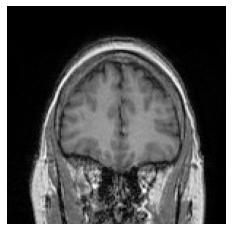

In [54]:
fig, ax = plt.subplots()
ax.imshow(T1[80][256:106:-1], cmap='Greys_r')
ax.axis('off')
plt.savefig('figures/test.jpg')

### Load a T2 Image

In [12]:
# load specified image
img_T2 = nib.load(image_files_T2[17])
img_T2

In [20]:
img_T2.shape

(256, 256, 130)

In [21]:
img_T2.get_fdata().shape

(256, 256, 130)

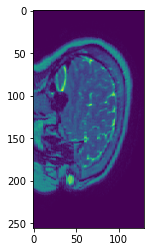

In [22]:
T2_image = img_T2.get_fdata()
# test_mask = 
fig, ax = plt.subplots()
ax.imshow(T2_image[80]//2)

## Create Images for EDA/ understanding Data

### Define function to create .gif given image data

In [9]:
# define function to create gif from image data
def create_gif(input_image, title='.gif', filename='test.gif'):
    # create .gif-like https://matplotlib.org/gallery/animation/dynamic_image2.html
    import imageio
    import matplotlib.animation as animate

    images = []
    input_image_data = input_image.get_fdata()

    fig = plt.figure()

    for i in range(len(input_image_data)):
        im = plt.imshow(input_image_data[i], animated=True)
        images.append([im])
    
    ani = animate.ArtistAnimation(fig, images, interval=25, blit=True, repeat_delay=500)
    plt.title(title, fontsize=20)
    plt.axis('off')
    ani.save(filename)
    plt.show()

#### Create T1 image

MovieWriter ffmpeg unavailable; using Pillow instead.


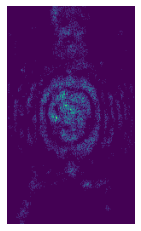

In [23]:
create_gif(nib.load(bd_image_files_T1[0]), title=None, filename="figures/T1_MRI.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


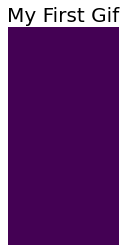

In [13]:
create_gif(img_T2, title='My First Gif', filename='figures/T2_MRI.gif')